In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\preet\OneDrive\Desktop\CSV File\creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0
284806,172792.000000,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.000000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


observe the different feature type present in the data

In [8]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape of the data frame: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


## ***Handling Missing Values***

Checking for the missing value present in each columns

In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


## Observation
We can see that there is no missing value present in the dataframe

#Observing the distribution of our classes

This code calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent" in a given DataFrame "df". 
It then computes the percentage of each class and stores it in "normal_share" and "fraud_share" variables, respectively. 
Finally, it prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.


In [10]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

print("==============================================")

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


This code computes the percentage of normal and 
fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.
The input is a Pandas dataframe "df" containing transaction data, with a column "Class" 
indicating whether the transaction is normal (0) or fraudulent (1).
The output includes the percentage of normal transactions and fraudulent transactions, 
as well as the imbalance percentage between the two. 
The imbalance percentage is calculated by dividing the percentage of fraudulent transactions by 
the percentage of normal transactions, and multiplying the result by 100.

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


The code creates a figure that displays two subplots side by side, 
with the left subplot showing the number of transactions in each class (0 or 1) 
and the right subplot showing the percentage of transactions in each class. 
The face color of the figure is set to magenta using the 'facecolor' parameter. 
The code then creates bar charts for the two subplots using the 'plot' method 
of the pandas DataFrame 'classes'. The y-axis label of the left subplot is set 
to 'Number of Transactions', and the x-axis label is set to 'Class', with a 
title of 'Number of Class Distributions'. Similarly, the y-axis label of the 
right subplot is set to 'Percentage of Transactions', and the x-axis label is 
set to 'Class', with a title of 'Percentage of Distributions'. 
The code then adds labels to the bars of both subplots using the 'bar_label' 
method. Finally, the figure is displayed using the 'show' method of pyplot.

<Figure size 2000x600 with 0 Axes>

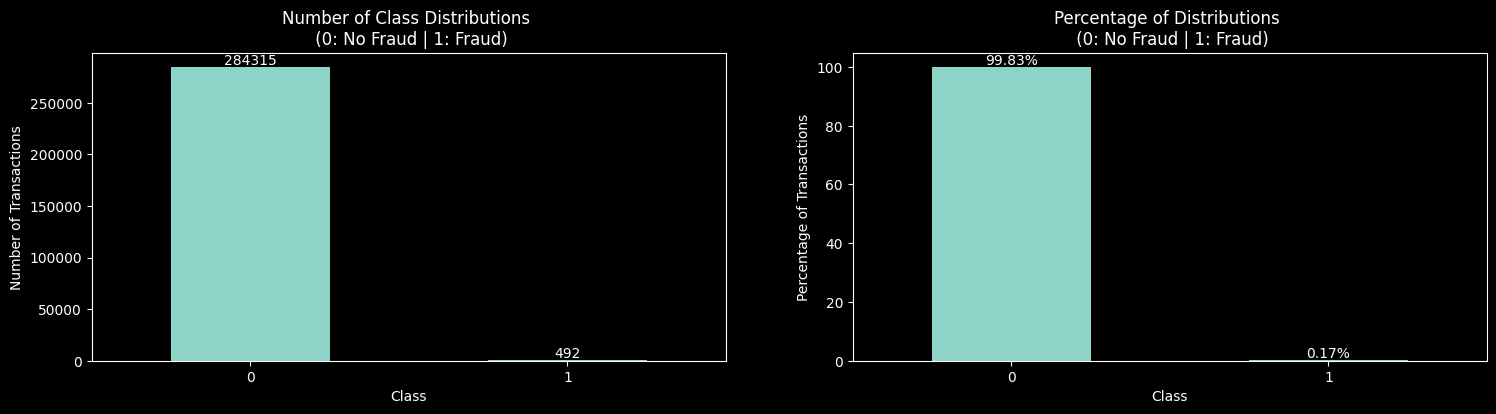

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='violet')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

## Observation
The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.
The percentage of distribution for majority class is 99.83% and minority class is 0.17%

Creates a scatter plot of Time vs Class with color-coded points and a legend.

Parameters:
-----------
df : pandas DataFrame
    The DataFrame containing the data to be plotted.
    
Returns:
--------
None

Notes:
------
This code creates a scatter plot of the Time variable on the x-axis and the Class variable on the y-axis. 
The points in the plot are color-coded using the cmap parameter based on whether a transaction is fraudulent or not. 
A colorbar is added to show the correspondence between color and class. 
A legend is also added to clarify the colors used for each class. 
The plot is displayed with a dark background and a magenta face color.

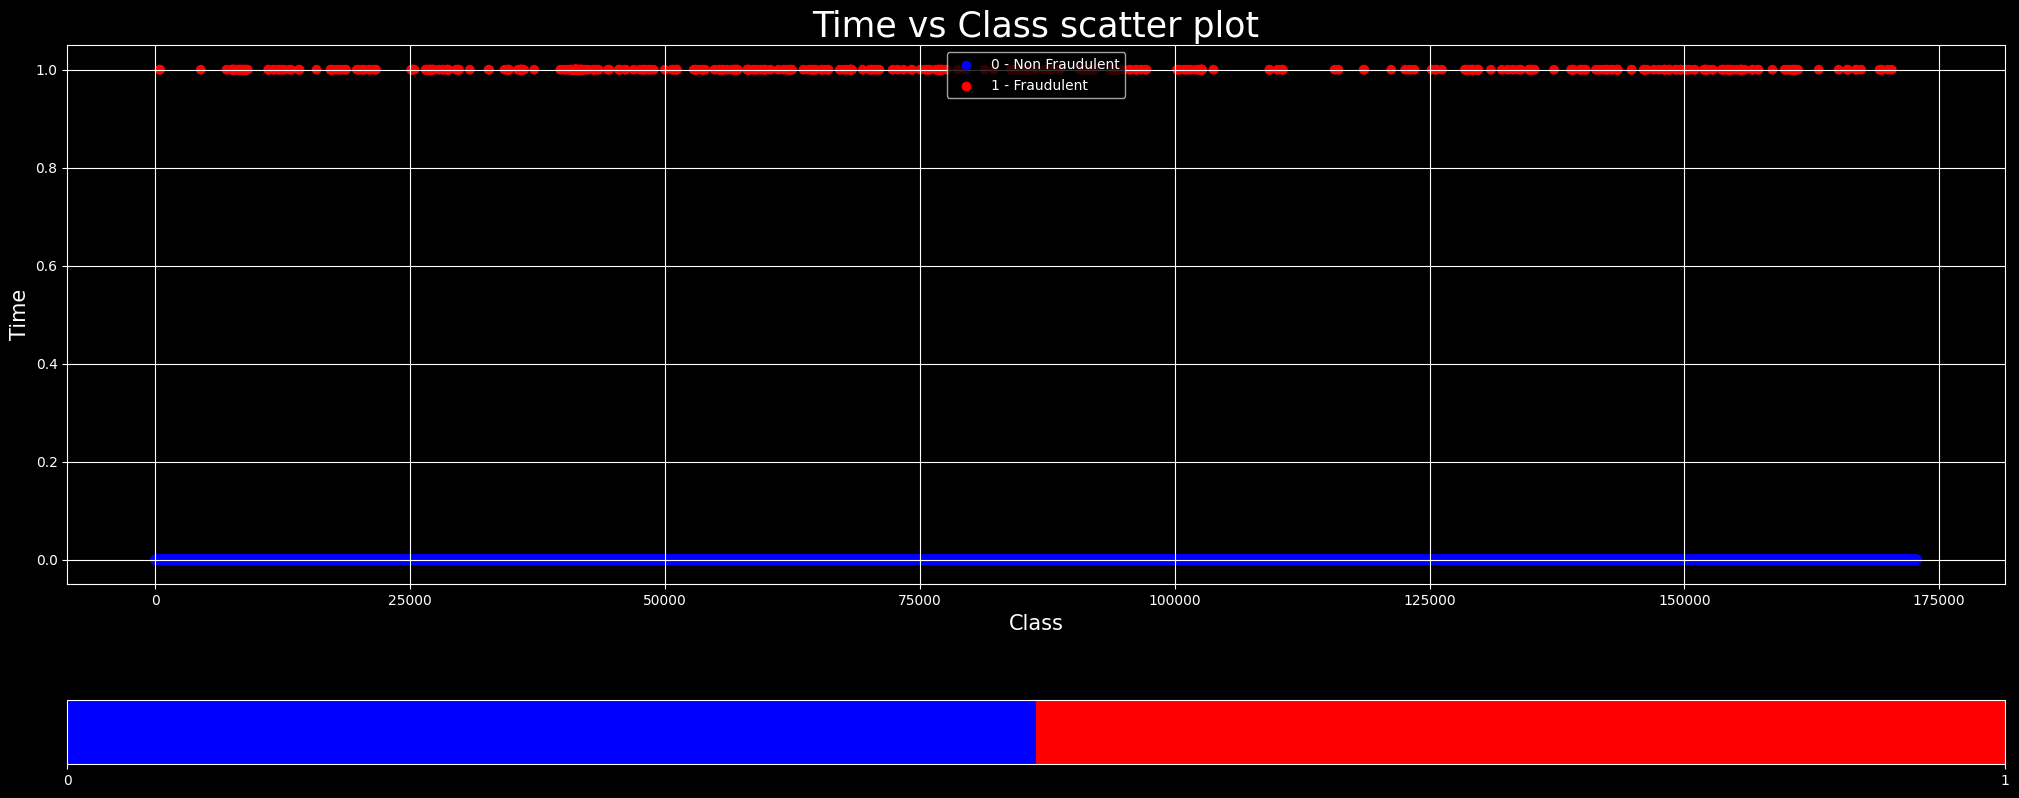

In [13]:
cmap = colors.ListedColormap(['blue', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='black')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()
 # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='blue', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

##Observation
There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

Creates a scatter plot of Amount vs Class with color-coded points and a legend.

Parameters:
-----------
df : pandas DataFrame
    The DataFrame containing the data to be plotted.
    
Returns:
--------
None

Notes:
------
This function uses the matplotlib library to create a scatter plot of Amount vs Class with color-coded points
based on the Class label (0 - Non Fraudulent or 1 - Fraudulent). The colormap used for the points is created
using colors.ListedColormap from the matplotlib library. The colorbar for the colormap is created using plt.colorbar with ticks at values 0 and 1 and an orientation of 'horizontal'. The aspect and pad parameters
are set to 30 and 0.15, respectively, to adjust the position and size of the colorbar.

The scatter plot title, x-axis label, and y-axis label are set using plt.title, plt.xlabel, and plt.ylabel, respectively.
The font sizes for the title and axis labels can be adjusted using the fontsize parameter.

A legend is created using plt.legend and the handles parameter to create scatter plots with empty points and the 
corresponding colors and labels for each Class value.

Finally, plt.grid is used to display a grid on the scatter plot, and plt.show is called to display the plot.

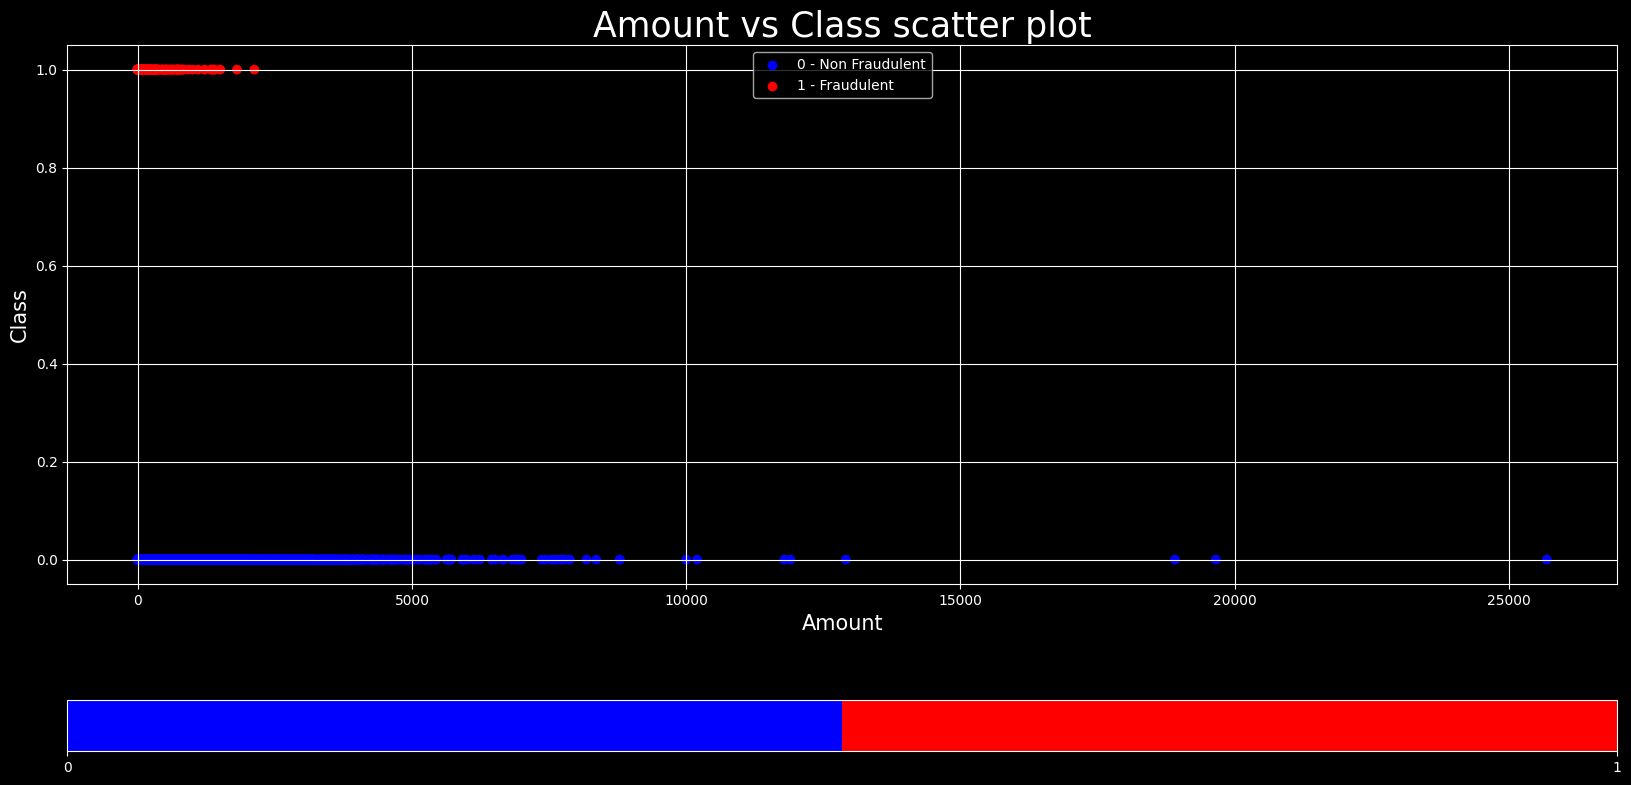

In [14]:
cmap = colors.ListedColormap(['blue', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='black')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='blue', label='0 - Non Fraudulent'),
                        plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

## Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

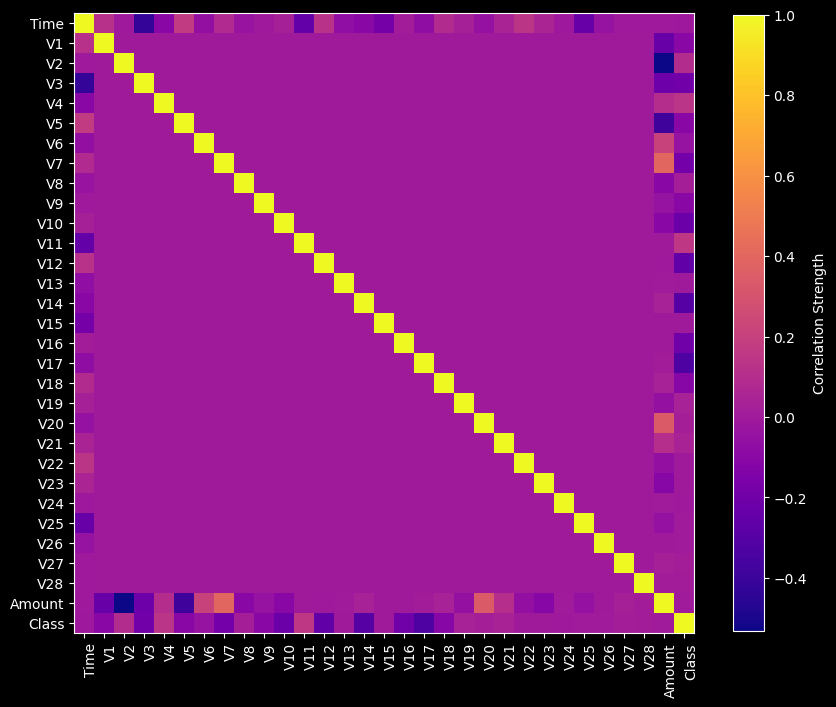

In [15]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# defining a function to create correlation matrix plot
def corrplot(data):
   with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()

# plotting the correlation matrix using the defined function
corrplot(df)
  

<Figure size 640x480 with 0 Axes>

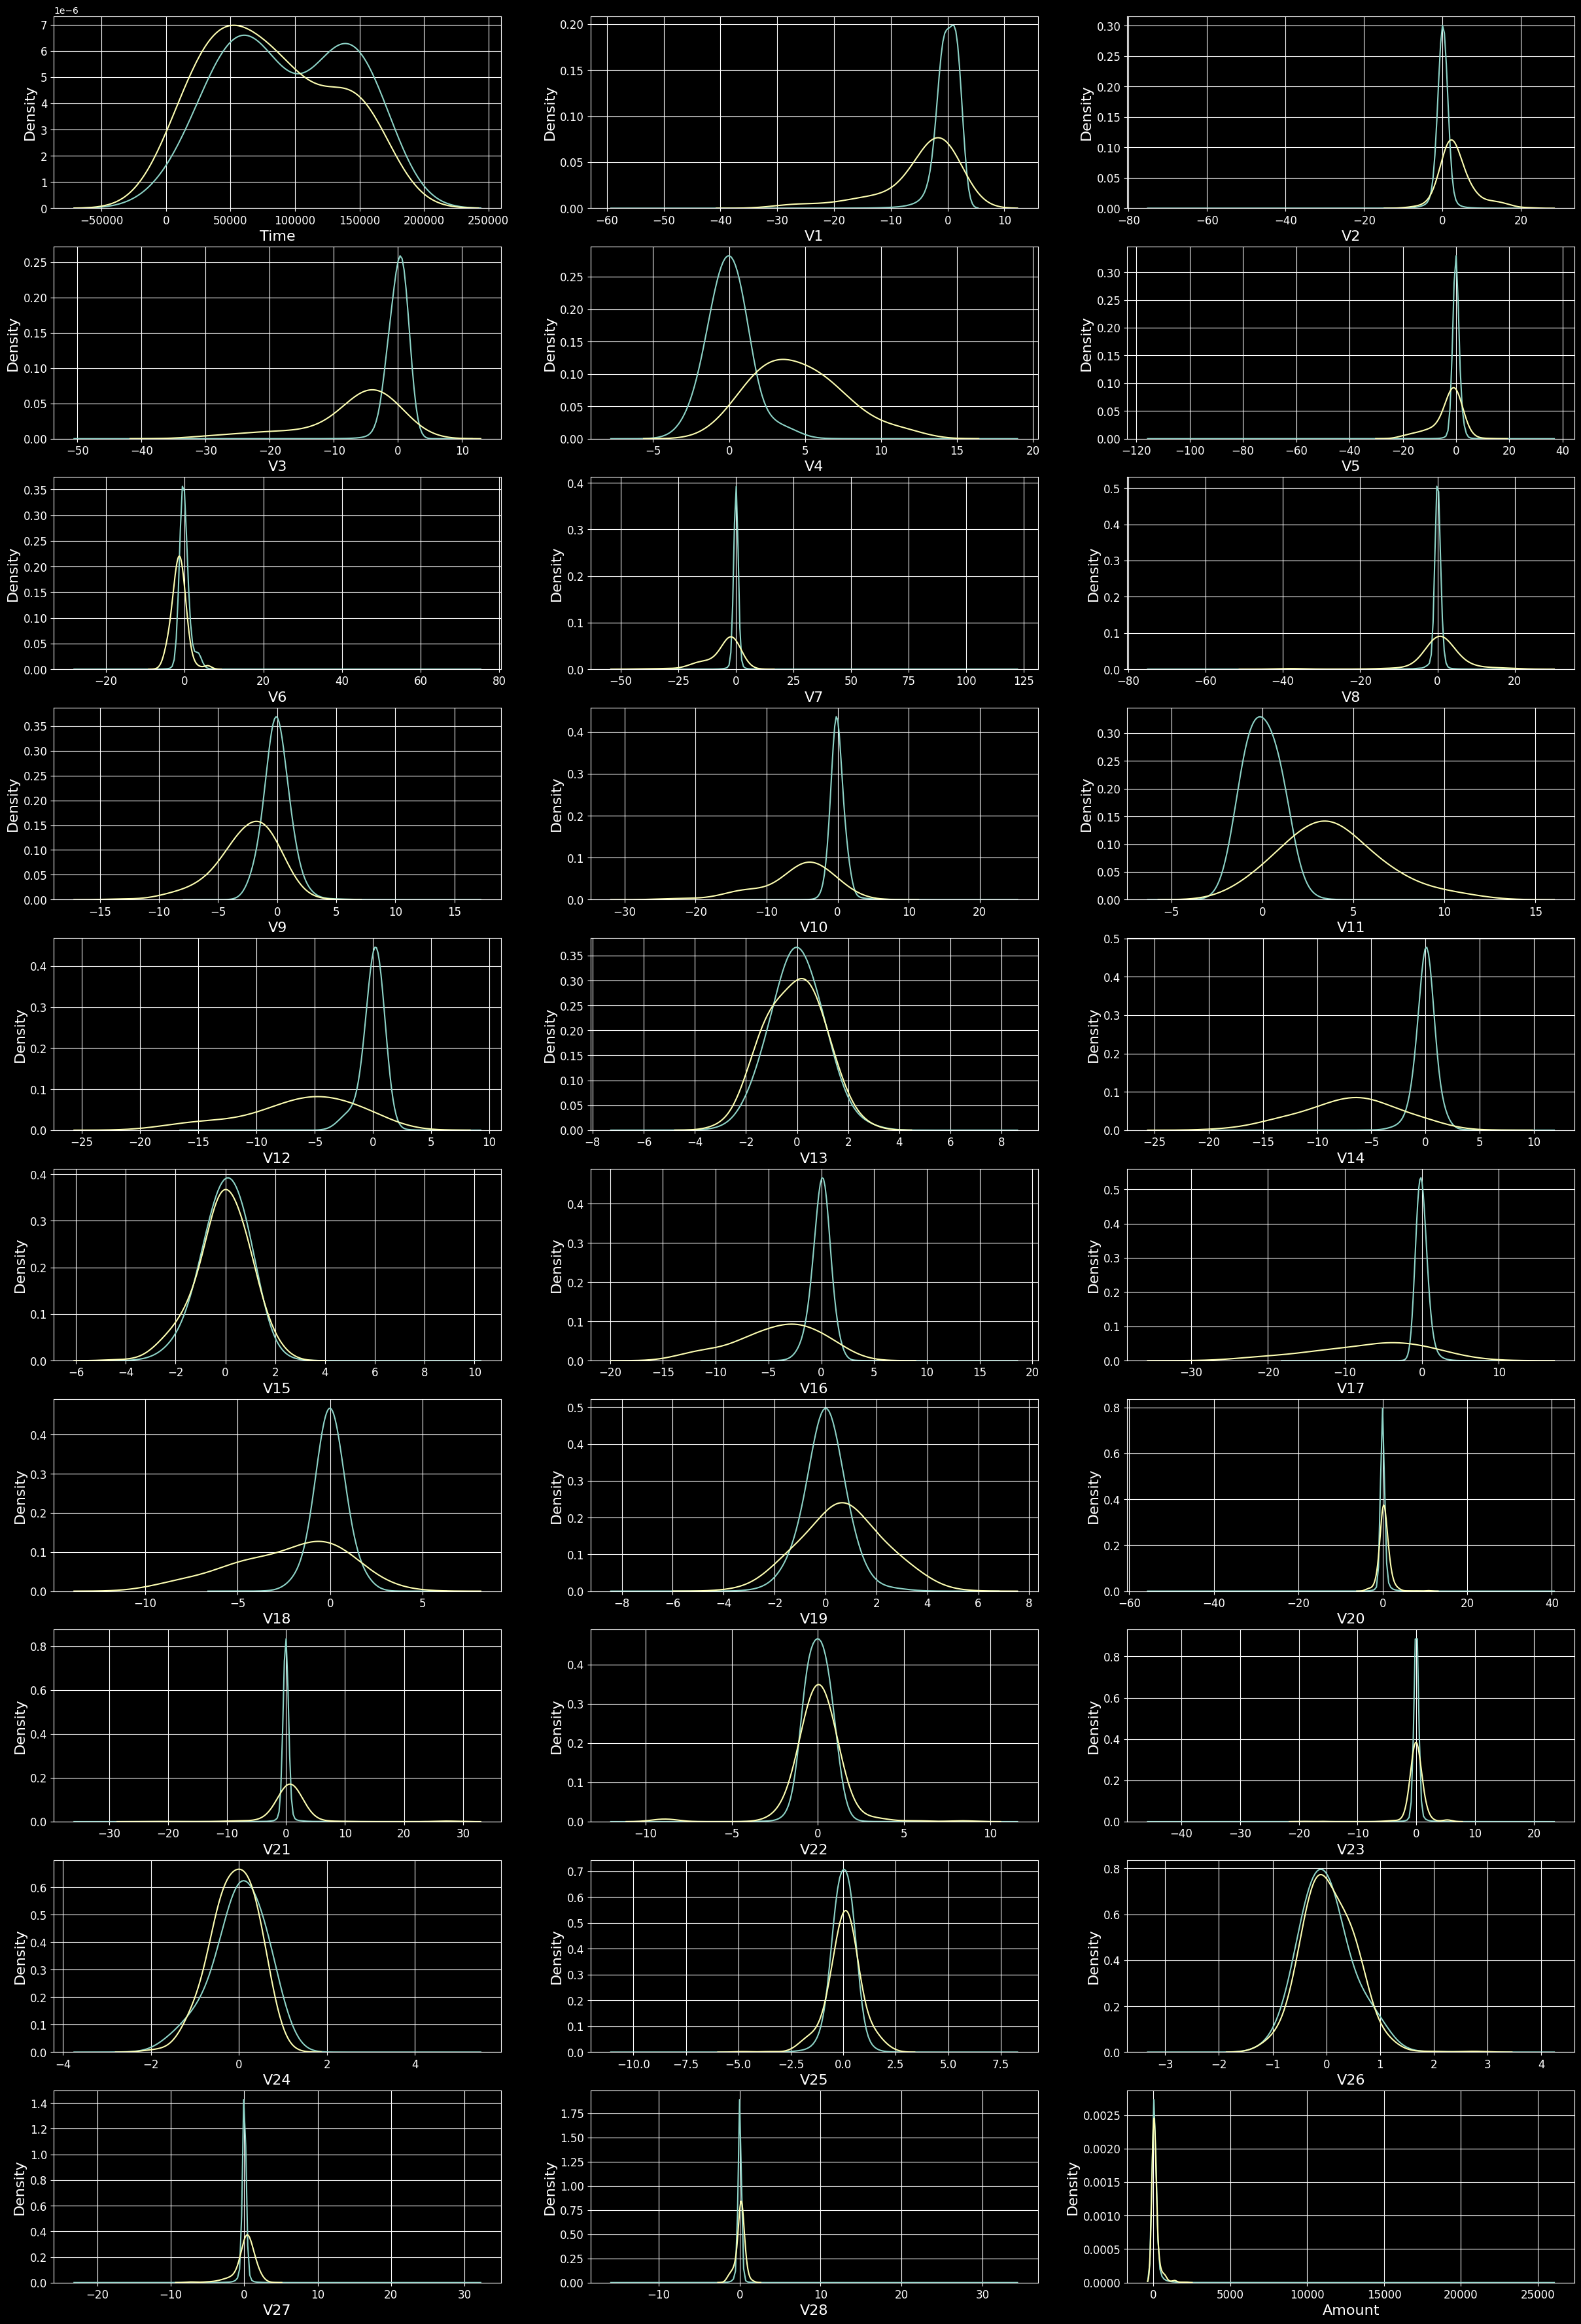

In [16]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='black');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

Droping unnecessary colume

In [17]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


# **Splitting the data into train & test data**

In [18]:
# y= #class variable
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [19]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((227845, 29), (56962, 29), (227845,), (56962,))

In [20]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [21]:

# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


## Feature Scaling using RobustScaler Scaler

In [22]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [23]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


#CHECKING SKEWNESS

The code defines a function to plot histograms of the variables in a given dataset to see the skewness.

Parameters:
-----------
X_train: a pandas DataFrame with the variables to be plotted as columns.
    
Returns:
--------
A grid of histograms, with each histogram representing the distribution of a variable in the input DataFrame.

Notes:
------
Histograms are useful for understanding the distribution of a variable and for identifying any potential skewness. 
If a histogram is symmetric, it indicates that the data is normally distributed, whereas a histogram that is skewed 
to the left or right suggests that the data is skewed in that direction.
By plotting the histogram of each variable in the training set, you can get an idea of the distribution of the data and whether any transformations are needed before modeling.

The histograms are plotted using the Seaborn histplot function. 
The grid layout is defined using the subplots function from matplotlib, 
and the size of the grid is set to 10 rows and 3 columns. 
The histograms are plotted using a loop over the variables in the input DataFrame, 
with each histogram plotted in a separate subplot. 
The title of each subplot corresponds to the name of the variable. 
The tight_layout function from matplotlib is used to optimize the layout of the subplots. 
The resulting plot is displayed using the show function from matplotlib

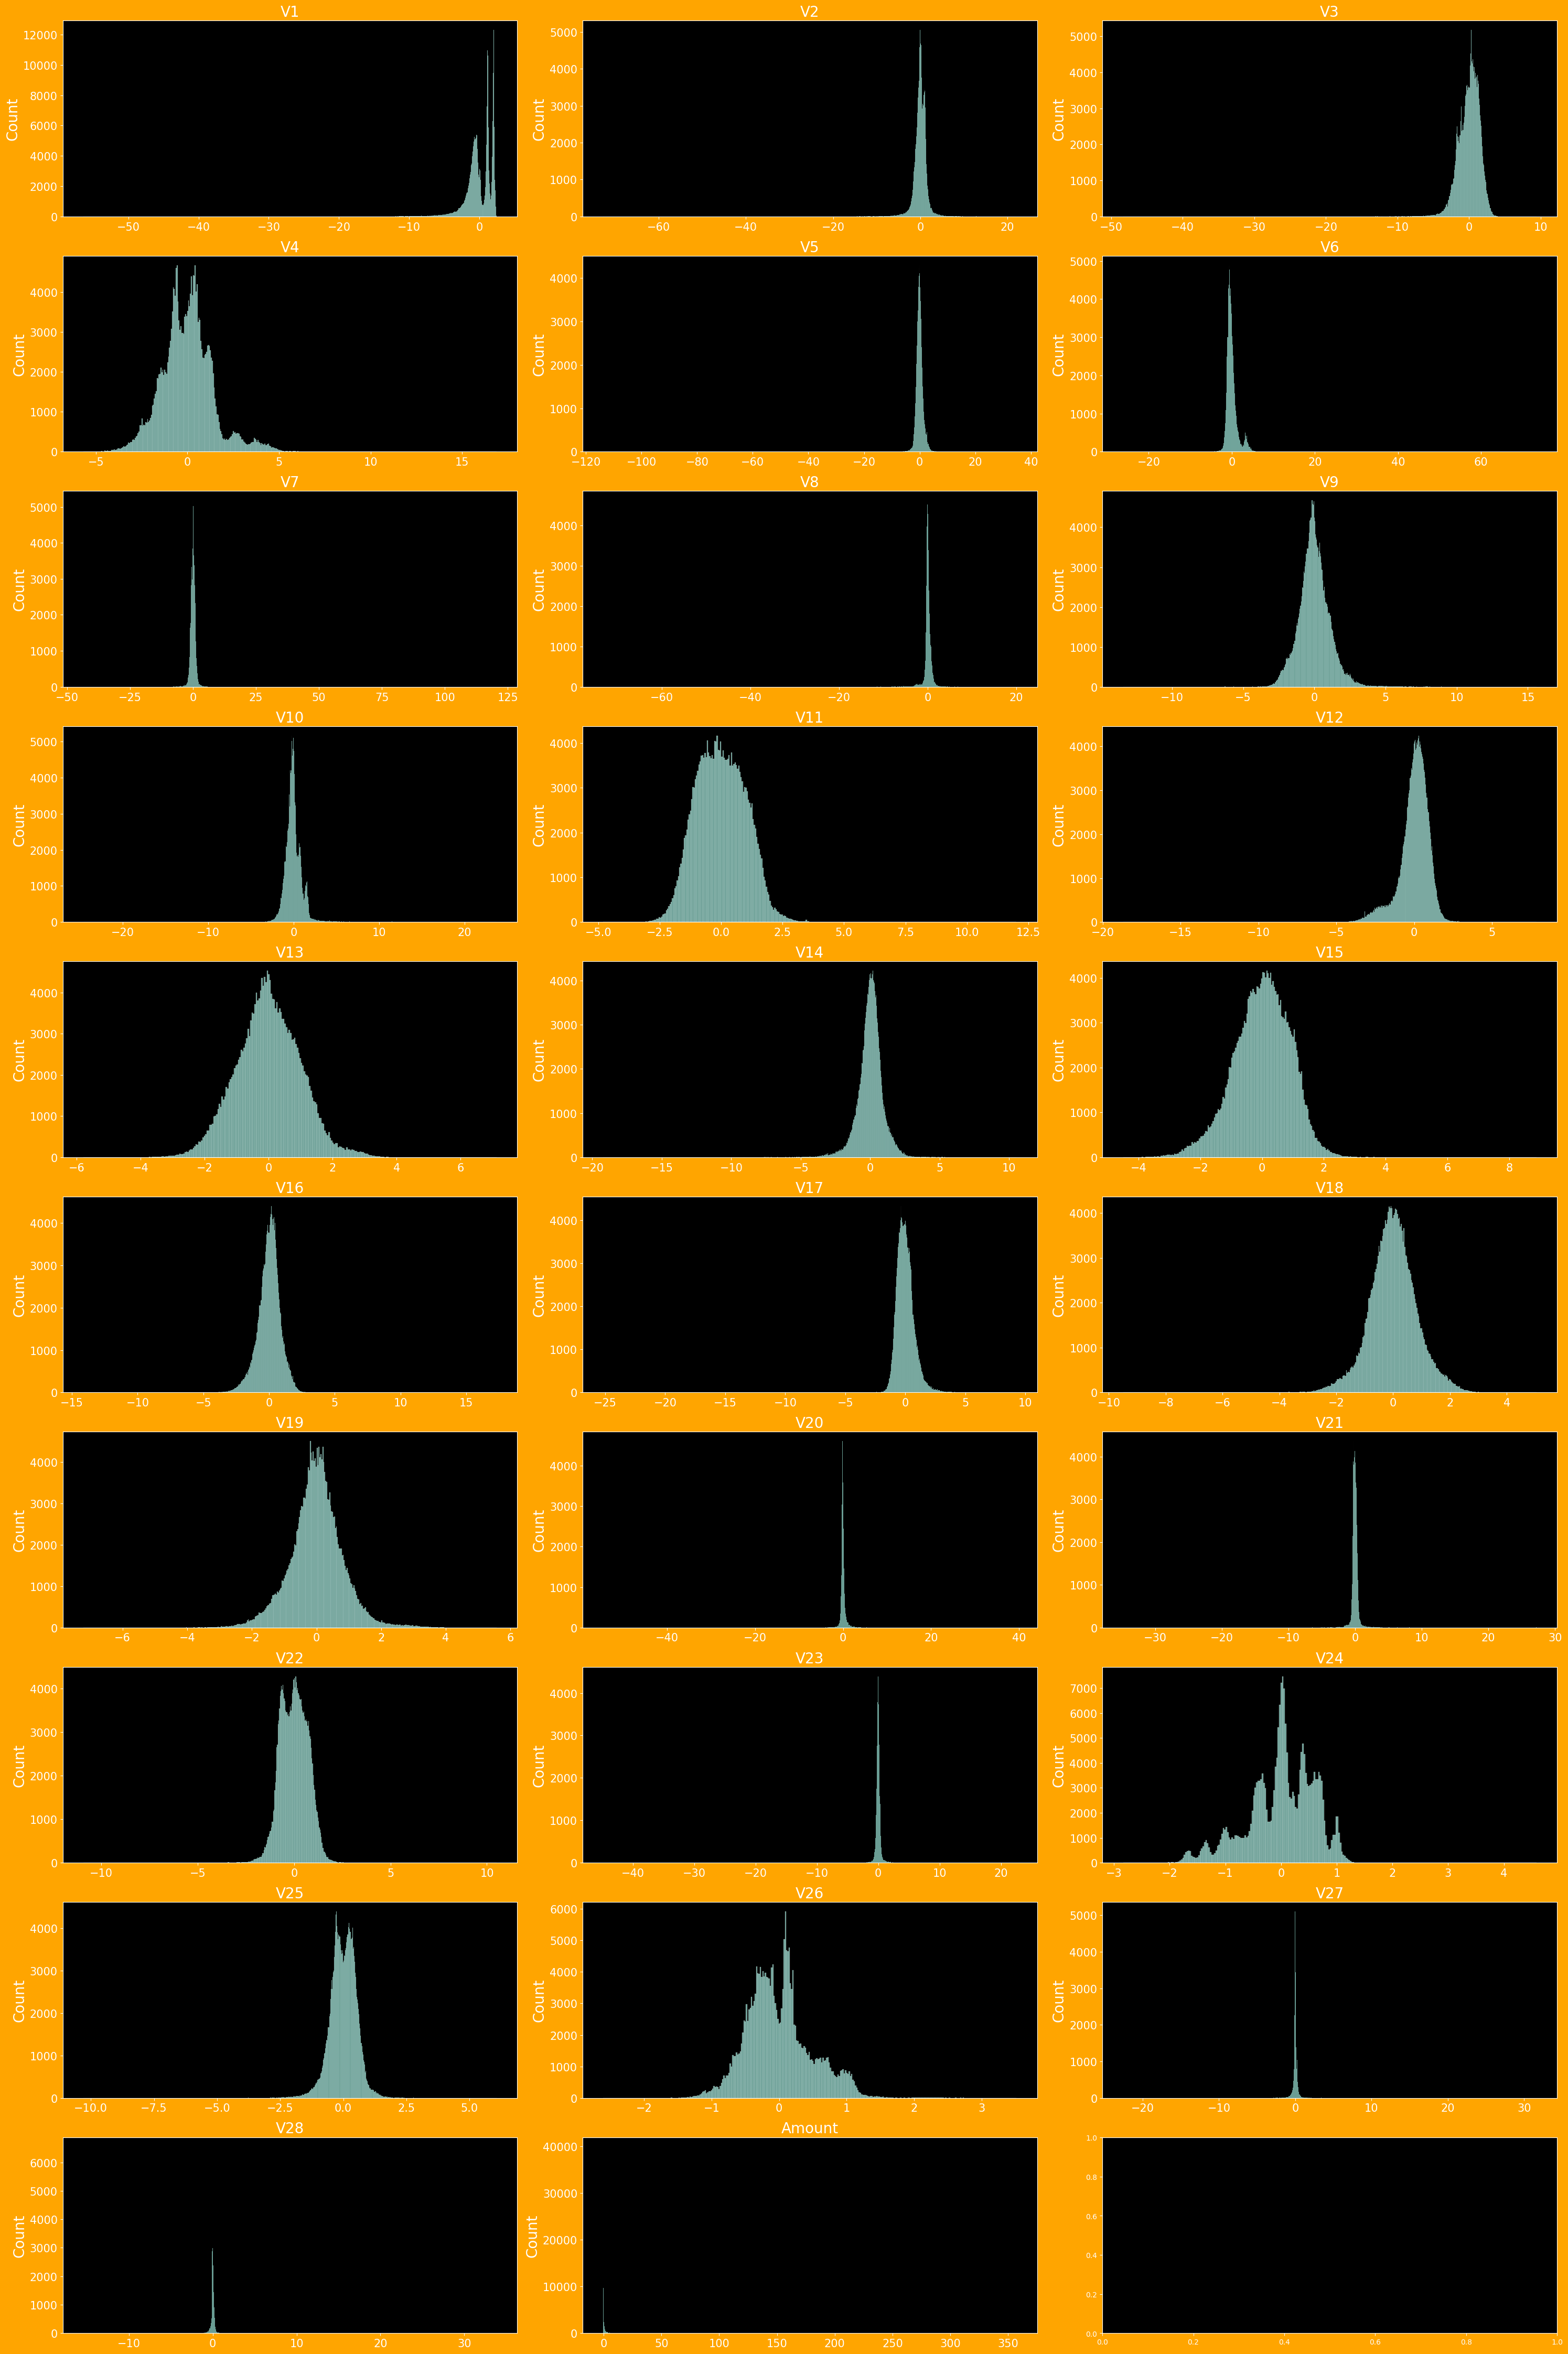

In [24]:
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='Orange')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

In [25]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [26]:
# Filtering the features which has skewness less than -1 and greater than +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

# *Treating Skewness*

In scikit-learn's PowerTransformer class, the copy parameter specifies whether to make a copy of the input data before applying 
the transformation or not. By default, copy is set to True, which means that the input data is copied to a new object before applying 
the transformation. 

The preprocessing.PowerTransformer() function is used to transform the data to have a more Gaussian-like distribution. 
Here, we are applying the transformation to the features that have a skewness greater than 1 or less than -1.

Both methods (yeo-johnson and box-cox) are commonly used to transform data to make it more normally distributed, 
which can improve the performance of some machine learning algorithms.

The yeo-johnson method is an extension of the box-cox method that allows for transformation of variables with negative values, 
while the box-cox method only works with variables that are strictly positive. 
Therefore, if you have variables with negative values, yeo-johnson would be the appropriate choice.This is a safety measure to ensure that the original input data is not modified in place. 
If copy is set to False, the transformation is applied directly to the input data and any changes made to the transformed data will 
also be reflected in the original data.
In general, it is recommended to keep copy=True unless you have a specific reason to modify the original data in place.

fit_transform is used for both fitting the transformer to the training data and transforming the data, 
while transform is used only for transforming new data based on a previously fitted transformer

In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


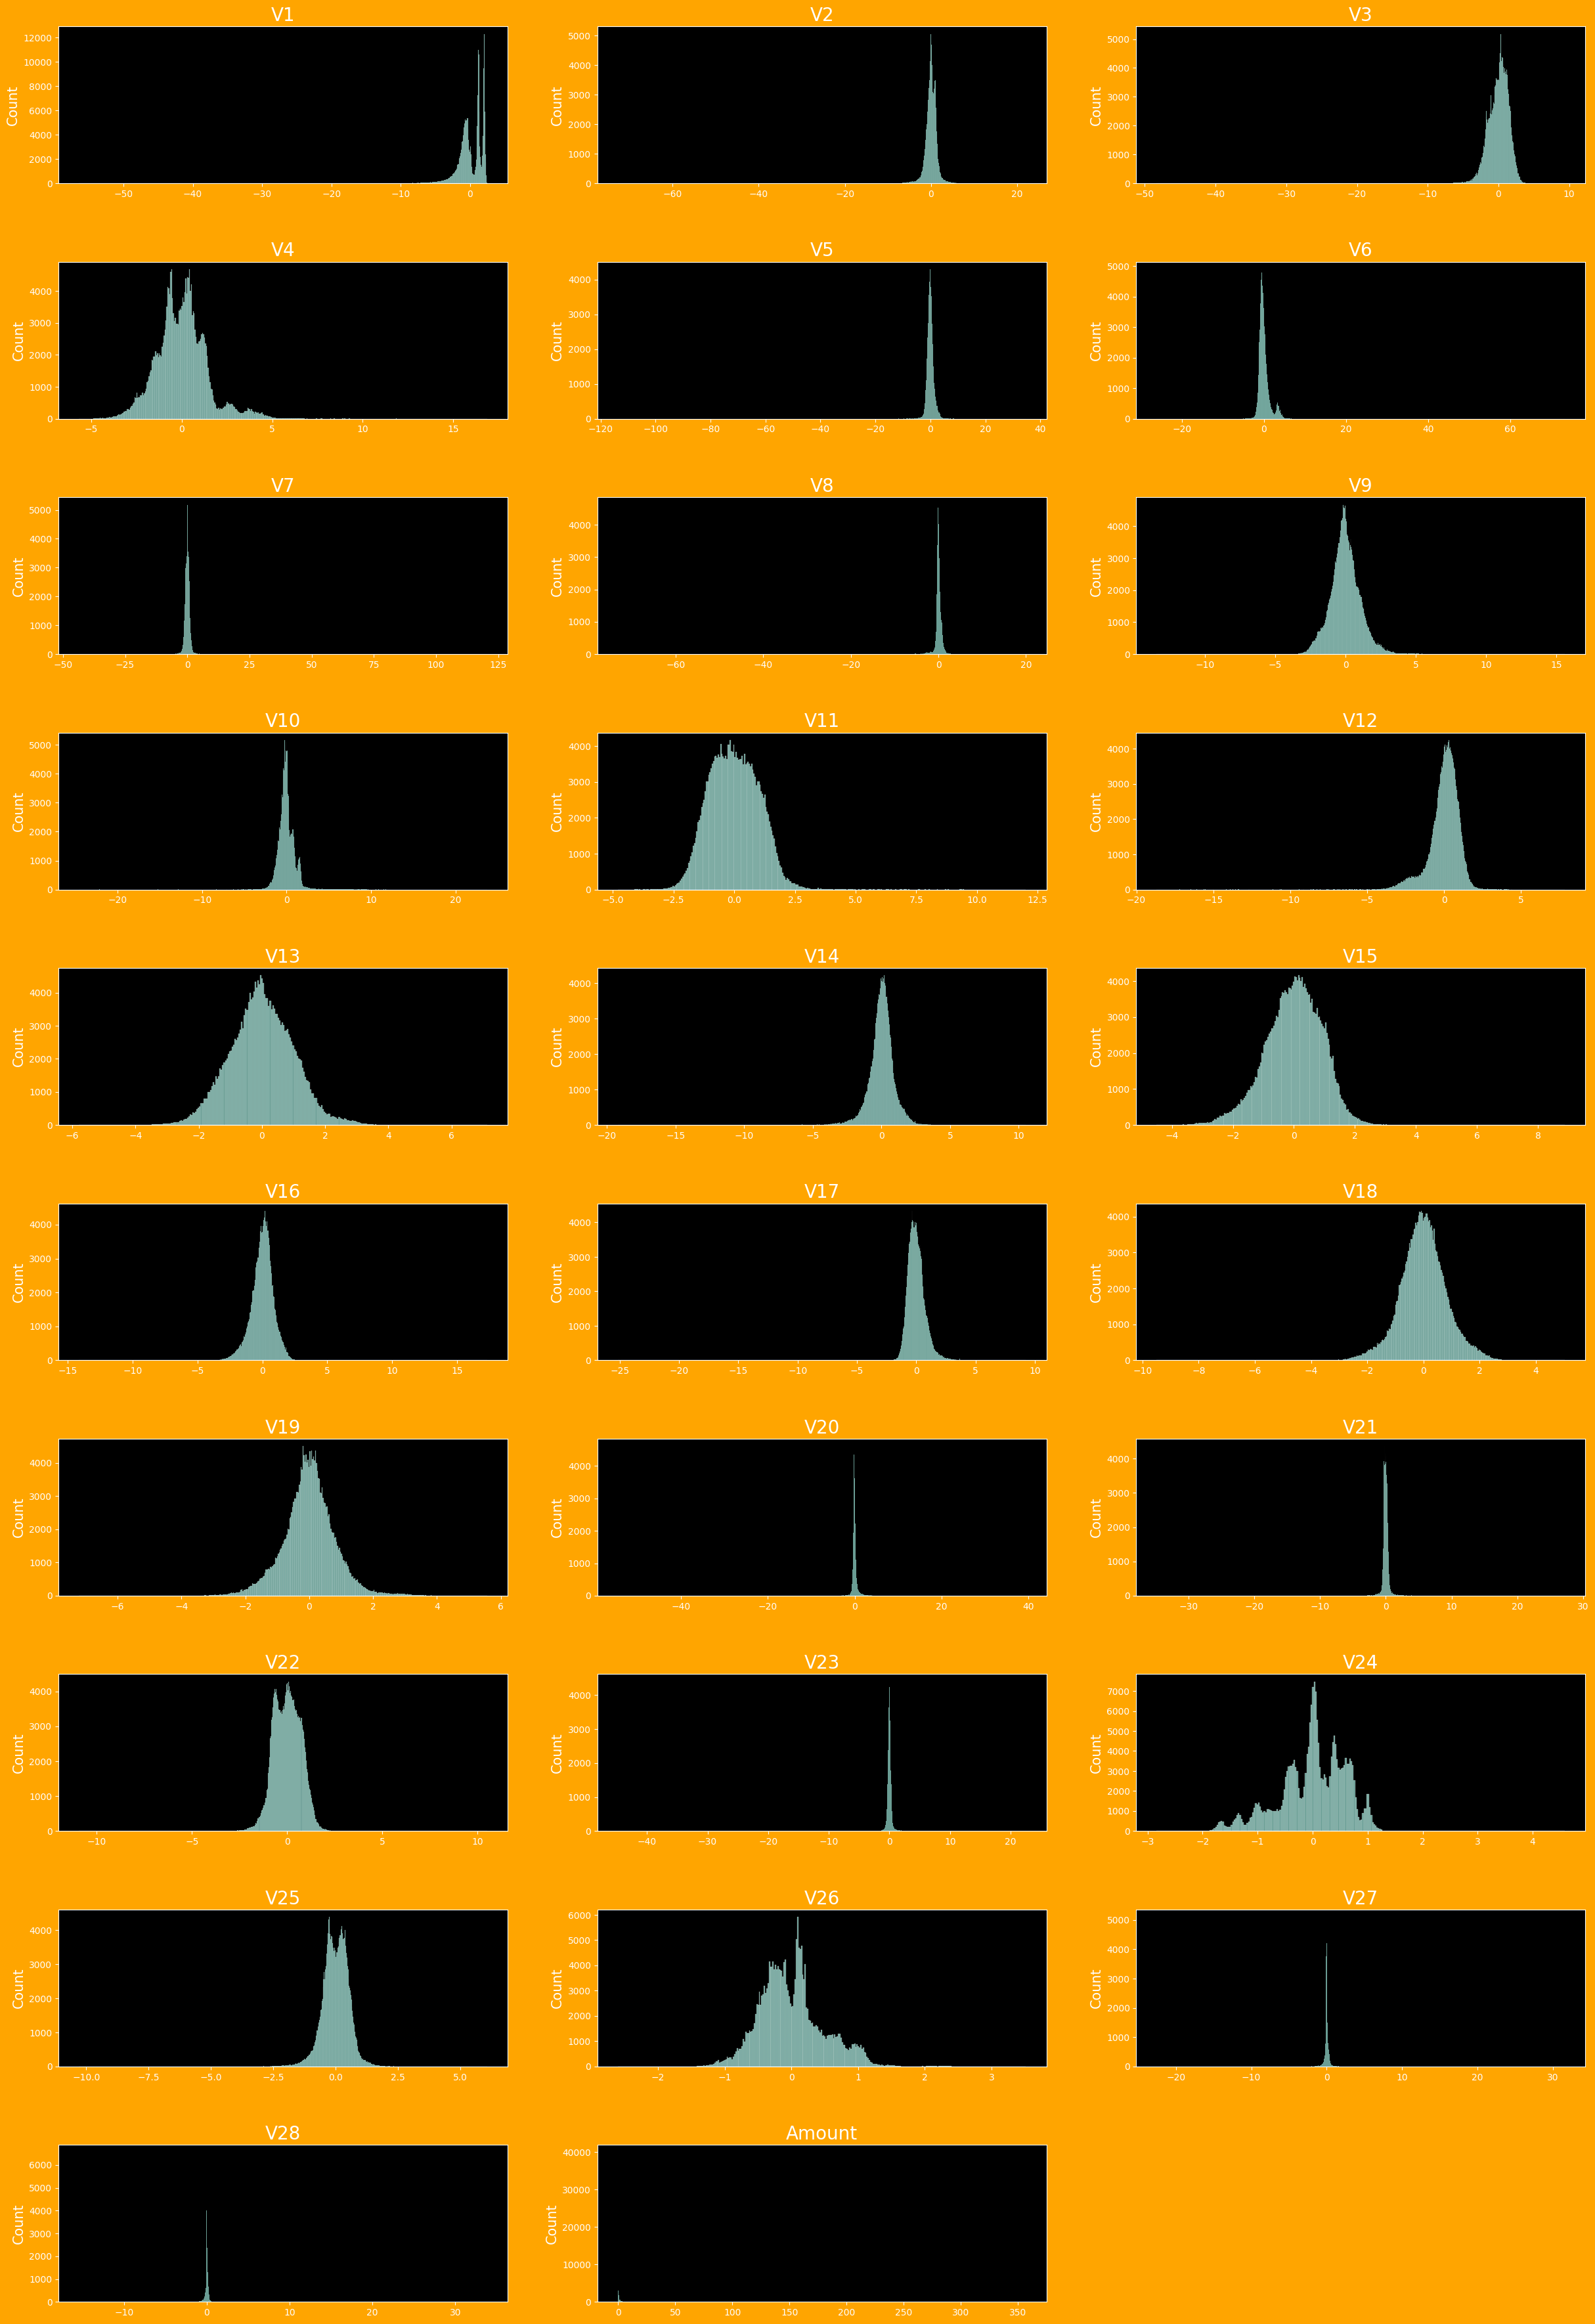

In [28]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='orange') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

In [29]:
y_train.value_counts()/y_train.shape

Class
0   0.998271
1   0.001729
Name: count, dtype: float64

In [30]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

#XG Boost

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 21.078251361846924 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 18.99890923500061 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 19.15681791305542 seconds
ROC-AUC Score for val data = 0.9158939065347269
Mean precision val score: 0.8776405678626743
Mean recall val score: 0.7183090446449225
Mean f1 val score: 0.7896274526701855
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 19.32894182

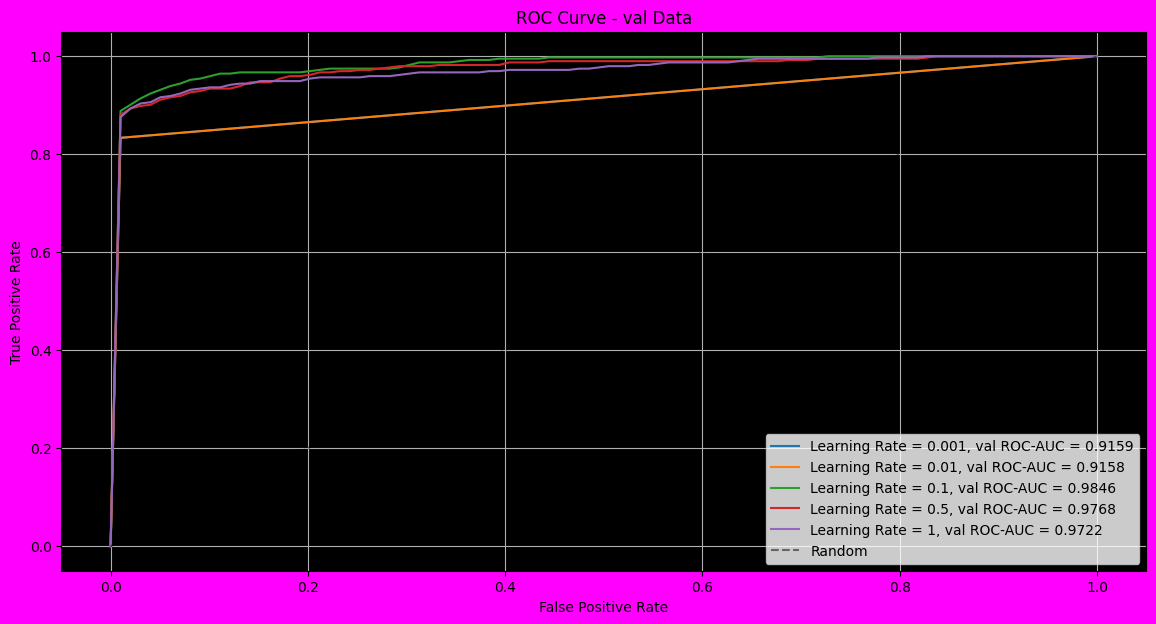

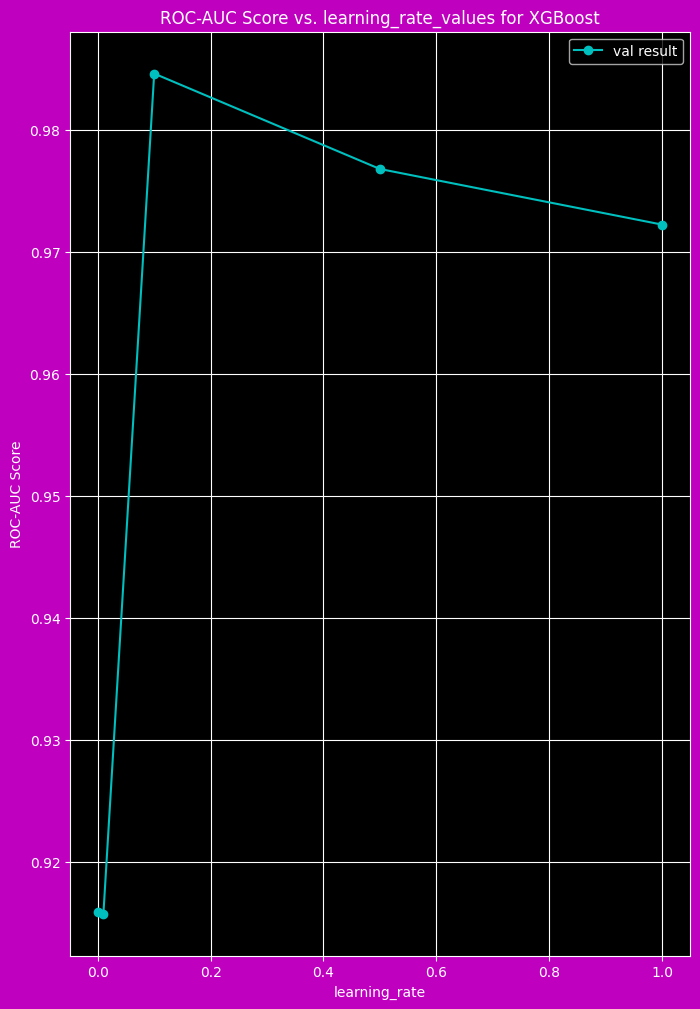





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9158939065347269, 0.9157719445681058, 0.9846133001161929, 0.9767951054816013, 0.9722369595172499]
Best Learning Rate : 0.1
Best Mean ROC-AUC score for val data: 0.9846133001161929
Mean precision val score for best C 0.9226024562965045
Mean recall val score for best C 0.779204256303493
Mean f1 val score for best C 0.8446711198211054




In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")

# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')
# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)
        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
        # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")
     # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")


Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

In [33]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2
start_time = time.time()


In [34]:
# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

In [ ]:
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()


In [ ]:
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

In [ ]:
# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

##Random Oversampling

In [ ]:
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print(y_ros_train_pt.value_counts())

In [ ]:
import seaborn as sns

sns.countplot(x=y_ros_train_pt)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_ros_train_pt[:,0])

#SMOTE

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print(y_smote_train_pt.value_counts())

In [ ]:
import seaborn as sns

sns.countplot(x=y_smote_train_pt)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_smote_train_pt[:,0])

In [ ]:
X_test_saved.head()

In [ ]:
y_test_saved.head()

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

##To choose the best threshold

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
start_time = time.time()
clf_XGBClassifier = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf_XGBClassifier.fit(X_smote_train_pt, y_smote_train_pt)
y_train_pred = clf_XGBClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

In [ ]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [ ]:
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

In [ ]:
import numpy
from sklearn import metrics
cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm =metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

In [ ]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.994203*0.997093)/(0.994203+0.997093)
print(f1)

In [ ]:
y_test_pred= clf_XGBClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.9880 else 0)
y_df.head()

In [ ]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

In [ ]:
from joblib import dump

In [ ]:
dump(clf_XGBClassifier, './../savedModels/clf_XGBClassifier.joblib')